In [1]:
# Задача: построить модель в виде решающего дерева, предсказывающую, выжил или нет пассажир в катастрофе "Титаника"

from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Построим дерево решений, которое будет предсказывать, выжил пассажир или нет.
# Проверим столбцы датафрейма на количество пропущенных значений

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Возьмем только самые информативные переменные, остальные и целевую переменную Survived удалим:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = df.Survived    # в виде пандовской серии

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [7]:
# Заменим столбцы с строковыми значениями на флаги:
X = pd.get_dummies(X)

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [8]:
# Заполним пропущенные значения возраста пассажиров медианным значением возраста:
X = X.fillna({'Age': X.Age.median()})    # словарь - чем заполнять пропущенные значения в колонках

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Тестовое множество составит 33%, оставшиеся 67% - тренировочное множество

In [10]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1, 31),
              'min_samples_split': range(50, 501, 50),
              'min_samples_leaf': range(10, 51, 10)
             }

In [12]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [13]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         

In [14]:
grid_search_cv_clf.best_params_
# При этих параметрах значение accuracy будет максимальным на кросс-валидационном множестве

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [15]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

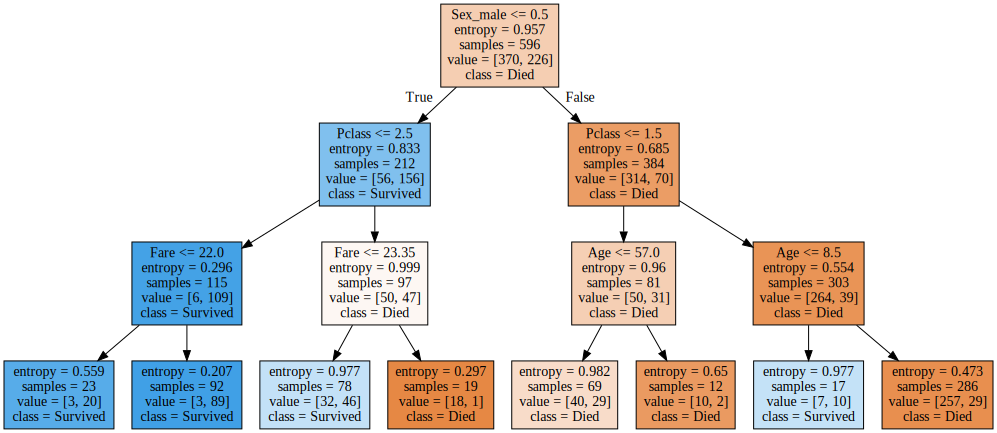

In [17]:
# Визуализируем решающее дерево
import graphviz

from IPython.display import SVG
from graphviz import Source    # Здесь ошибка
from IPython.display import display

dot_data = tree.export_graphviz(best_clf,
                                out_file = None,
                                feature_names = list(X),
                                class_names = ['Died', 'Survived'],
                                filled=True, 
                                )
graph = Source(dot_data)
display(SVG(graph.pipe(format = 'svg')))

In [18]:
print(best_clf.score(X_train, y_train))    # Точность на тренировочных данных
print(best_clf.score(X_test, y_test))    # Точность на тестовых данных

y_pred = best_clf.predict(X_test)

y_predicted_prob = best_clf.predict_proba(X_test)
# В предсказаниях нашего дерева хранится предсказанная вероятность отнесения к одному из двух классов

0.8221476510067114
0.8


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7766990291262136
0.6896551724137931


In [20]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[156,  23],
       [ 36,  80]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

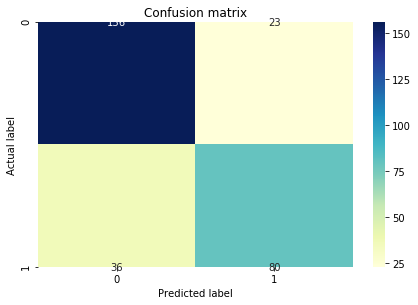

In [21]:
# Отобразим Confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
ax.yaxis.set_label_position("left")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Роль признаков при построении решающего дерева
importances = best_clf.feature_importances_
feature_importances = pd.DataFrame({'features':list(X_train),
                                        'feature_importances': importances})
feature_importances.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.571169
0,Pclass,0.275292
1,Age,0.078670
4,Fare,0.074869
2,SibSp,0.000000
3,Parch,0.000000
5,Sex_female,0.000000
